# Python and Data Science
## Machine Learning
### Part 1: Linear Regression using Scikit-Learn

Libraries Used:

- [Numpy](https://www.youtube.com/watch?v=lLRBYKwP8GQ&t=1073s) - Used for making arrays
- [Pandas](https://www.youtube.com/watch?v=zN2Hua6oII0&t=8s) - Used for handling data sets
- [matplotlib](https://www.youtube.com/watch?v=nzKy9GY12yo) - Used for making charts and graphs
- [scikit-learn intro](https://www.youtube.com/watch?v=rvVkVsG49uU) - Used to handle complex mathematics
- [scikit-learn tut](https://www.youtube.com/watch?v=M9Itm95JzL0) - In depth discussion
- [pickle](https://www.youtube.com/watch?v=6Q56r_fVqgw) - Used to preserve trained models


In [43]:
# Imports necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [44]:
data = pd.read_csv("student-mat.csv", sep=";") #read data from the file "student-mat.csv" and store it in the dataframe
print(data.head())#prints the first couple of rows from the data frame to the console

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [45]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]] #filters the data from the dataframe to only include the following G1", "G2", "G3", "studytime", "failures", "absences"
print(data.head()) #prints the first couple of rows from the data frame to the console

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


## Attributes and Labels

In machine learning:

1. **Attributes** (Features): Characteristics or properties of data used as input for algorithms. Also known as variables or features. Represented by a feature vector for each data point.

2. **Labels** (Target Variable): Values we want the model to predict or learn. The dataset is labeled in supervised learning, where each data point has an associated label serving as ground truth.

The goal is to use attributes to learn patterns and relationships that enable the model to predict labels for new, unseen data.

List the attributes here:

What is the label in this example?


In [46]:
predict = "G3" #specifies the data that is intended on being predicted

x = np.array(data.drop(predict, axis=1)) #creates numpy array
y = np.array(data[predict]) #creates numpy array

In [47]:
# Split the data set into training and testing sets
#sets 10% of data away for testing (test_size=0.1), and uses 90% for training
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

### Linear Regression
 Using a set of data points, the LR algorithm attempts to find a 'line of best fit' through the data.
 The 'line of best fit' is a corrrelation between the data points.
 LR is best used in a situation when there is a strong correlation of data to begin with.
 
 <table>
    <tr>
        <td>
            <img src="LR-data1.png" width="50%" />
        </td>
        <td>
            <img src="LR-data2.png" width="50%" />
        </td>
    </tr>
    <tr>
        <td>
            <p style="text-align:center">Strongly Correlated</p>
        </td>
        <td>
            <p style="text-align:center">Poorly Correlated</p>
        </td>
    </tr>
 </table>
 
 <b>Linear Equation: y = mx + b, where m is the gradient of the line.
 For any given x and a known gradient, y can be predicted.</b>

In [48]:
# linear = linear_model.LinearRegression()

# # Define the line of best fit
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
# print(acc)

## Save the Model with pickle

- use the runall button several times until we get a high acc value

- Comment out the cell above

In [49]:
with open("studentmodel.pickle", "wb") as f: #open file named "studentmodel.pickle"
    pickle.dump(linear, f)

NameError: name 'linear' is not defined

In [35]:
# Load the pickle file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in) #load the stored model in the pickle file back into the variable "linear"

EOFError: Ran out of input

In [188]:
print('Coefficient: \n', linear.coef_) #prints co-efficient
print('Intercept: \n', linear.intercept_) #prints intercept

Coefficient: 
 [ 0.14893069  0.9827544  -0.17925407 -0.27916561  0.03577086]
Intercept: 
 -1.5159285078593356


In [189]:
predictions = linear.predict(x_test) #predicts target values using the linear model on the test set called "x_test"

for x in range(len(predictions)): #loop through the range of the variable "predictions" array length
    print(predictions[x], x_test[x], y_test[x]) #prints the input features, predicted value, and target value for each prediction

8.013868154648213 [10  8  1  0 10] 9
12.719063033088005 [14 12  2  0 20] 13
12.326137068984393 [10 13  2  1  6] 13
9.753057286685083 [ 8 10  1  0 12] 10
18.465571742582725 [19 18  3  0  0] 19
15.249770520472037 [16 15  2  0  0] 15
8.453812655950523 [9 9 2 0 4] 10
18.090321371181403 [16 18  3  0  2] 18
8.787045104529504 [11  9  3  0 10] 10
12.32598341564363 [14 12  1  0  4] 11
5.887734108583204 [ 7  6  1  0 18] 6
9.466890440716213 [ 8 10  1  0  4] 10
13.820224033008328 [13 14  2  0  0] 15
8.35194756426279 [10  9  3  0  2] 10
17.829231148609637 [17 17  2  0 13] 17
11.84402099151898 [14 11  1  0 18] 13
11.956580315555723 [12 12  1  0  2] 11
9.693210117819689 [10 10  1  0  2] 10
10.890589656866512 [10 11  1  0  8] 10
15.100839826174191 [15 15  2  0  0] 15
11.195452280394193 [12 11  1  1 16] 12
7.9071090365134715 [6 9 1 1 4] 8
13.916241853382653 [11 14  1  0  6] 14
3.8470104651123354 [ 6  5  1  3 16] 5
11.241517572726487 [11 12  3  1  4] 11
8.423489275755006 [10  9  3  0  4] 9
4.61296558673

## Plot the data

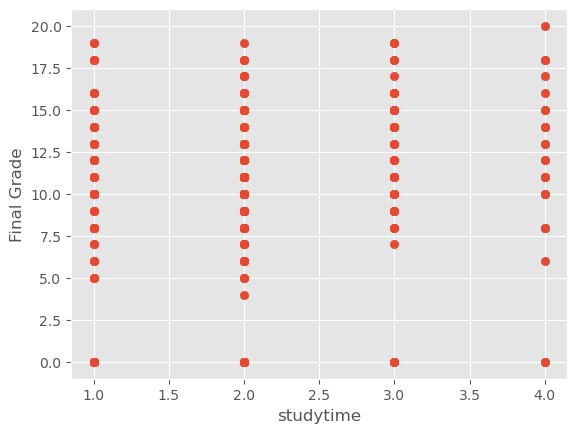

In [193]:
style.use("ggplot") #sets plotting style to "ggplot"


p = "studytime" #define the variable for the result to be plotted
pyplot.scatter(data[p], data["G3"])# Set up a scatter plot
pyplot.xlabel(p) #set x-axis label
pyplot.ylabel("Final Grade") #set y-axis label
pyplot.show() #displays the plot